## Week 8: Simulation of the JAK2-SKE complex in explicit solvent simulations

In [ ]:
# Tutorial 1: Building Protein Systems in Explicit Solvent
# https://ambermd.org/tutorials/basic/tutorial7/index.php

# Tutorial 2: Simulating the Green Fluorescent Protein and Building a Modified Amino Acid Residue
# https://ambermd.org/tutorials/basic/tutorial5/

# Tutorial 3: Simulating a pharmaceutical compound using antechamber and the Generalized Amber Force Field
# https://ambermd.org/tutorials/basic/tutorial4b/

# Tutorial 4: Relaxation of Explicit Water Systems
# https://ambermd.org/tutorials/basic/tutorial13/index.php



In [ ]:
$ module load amber/openmpi/intel/22.03

#### Part 0: Prepare the pdb file

In [ ]:
"""
Checking PDB Process:
1) Non-Standard Residues --> SKE Ligand
2) Metals --> No metals
3) Experimental methods noted in the paper associated with the PDB --> not multi-wavelength anomalous dispersion (MAD)
4) Solvent molecules or crystallization buffer --> use explicit solvent system, keep water
5) Missing electron density (amino acids) --> no missing residues
6) Disulfide Bonds --> no disulfide bonds (SSBOND)
7) Protonation States --> use PDB2PQR (reconstructing missing atoms, adding hydrogens, assigning atomic charges and radii from specified force fields, and generating PQR files)

"""

In [ ]:
# There are two options for modeling solvents in simulations known as explicit or implicit solvent.
# HW7 use igb=8 implicit solvent model: "set default PBRadii mbondi3"
# HW8 use tip3p explicit water model: "source leaprc.water.tip3p"

In [ ]:
# Explicit water models should be matched with the solute force field and the ion model. 
# For instance, ff14SB for proteins includes empirical corrections for using the TIP3P water model
# Molecule: GAFF2 force field

In [ ]:
$ wget https://files.rcsb.org/download/5USZ.pdb

In [ ]:
# Get protein-ligand information

$ grep -vE 'GOL|DMS|CONECT' 5USZ.pdb > 5usz_complex.pdb

In [ ]:
# Use pdb4amber to prepare the PDB file
# --dry: remove crystallographic waters
# --reduce: add hydrogen atoms in their optimal locations
# The output file should contain all of the hydrogens for each of the residues

$ pdb4amber -i 5usz_complex.pdb -o 5usz_complex_h.pdb --dry --reduce

In [ ]:
$ sed 's/SKE/JNJ/g' 5usz_complex_h.pdb > 5usz_complex_new.pdb

In [ ]:
# The following (original) chains have been found:
# A

# ---------- Alternate Locations (Original Residues!))

# The following residues had alternate locations:
# LYS_25
# -----------Non-standard-resnames
# SKE

# ---------- Missing heavy atom(s)

# ARG_5 misses 6 heavy atom(s)
# GLU_7 misses 4 heavy atom(s)
# LYS_22 misses 4 heavy atom(s)
# ARG_29 misses 6 heavy atom(s)
# GLN_36 misses 4 heavy atom(s)
# LYS_49 misses 4 heavy atom(s)
# ARG_52 misses 6 heavy atom(s)
# GLU_56 misses 4 heavy atom(s)
# GLU_60 misses 4 heavy atom(s)
# LYS_67 misses 4 heavy atom(s)
# LYS_94 misses 4 heavy atom(s)
# LYS_103 misses 4 heavy atom(s)
# LYS_104 misses 4 heavy atom(s)
# ASN_107 misses 3 heavy atom(s)
# CYS_108 misses 1 heavy atom(s)
# LYS_141 misses 4 heavy atom(s)
# ARG_151 misses 6 heavy atom(s)
# LYS_152 misses 4 heavy atom(s)
# LYS_173 misses 4 heavy atom(s)
# GLU_178 misses 4 heavy atom(s)
# GLN_224 misses 4 heavy atom(s)
# LYS_240 misses 4 heavy atom(s)
# ARG_267 misses 6 heavy atom(s)
# LEU_272 misses 3 heavy atom(s)
# The alternate coordinates have been discarded.
# Only the first occurrence for each atom was kept.

#### Part 1: Prepare the ligang topology (SKE)

In [ ]:
$ grep "HETATM" 5usz_complex_h.pdb > jnj_h.pdb

# Manual delete other elements and only keep SKE

In [ ]:
# change the name of the residue from "SKE" to "JNJ"
# sed: This is the command for the stream editor
# s = substitution
# g = global 

$ sed 's/SKE/JNJ/g' jnj_h.pdb > jnj_new.pdb

In [ ]:
# Goal: get charges and atom types

# -i jnj_h.pdb: input 3D structure file
# -fi: pdb tells antechamber that this is a pdb format file
# -fo mol2: formate of the output file is Tripos Mol2
# -c bcc: tells antechamber to use the AM1-BCC charge model in order to calculate the atomic point charges
# -s 2: option defines the verbosity of the status information provided by antechamber.

$ antechamber -i jnj_new.pdb -fi pdb -o jnj.mol2 -fo mol2 -c bcc -s 2

In [ ]:
# utility parmchk2 to test if all the parameters we require are available
# jnj.frcmod is a parameter file that can be loaded into LEaP in order to add missing parameters

$ parmchk2 -i jnj.mol2 -f mol2 -o jnj.frcmod

In [ ]:
# Run tleap

$ tleap -f oldff/leaprc.ff99SB

In [ ]:
# Use GAFF2 force field

$ source leaprc.gaff2

In [ ]:
# load JNJ as a unit in LEaP

$ JNJ = loadmol2 jnj.mol2 

# Loading Mol2 file: ./jnj.mol2
# Reading MOLECULE named JNJ

In [ ]:
$ check JNJ

# Checking 'JNJ'....

# Checking parameters for unit 'JNJ'.
# Checking for bond parameters.
# Checking for angle parameters.
# Unit is OK.


In [ ]:
# tell tleap the parameters

$ loadamberparams jnj.frcmod

In [ ]:
# create the library file for JNJ

$ saveoff JNJ jnj.lib

In [ ]:
$ saveamberparm JNJ jnj.prmtop jnj.rst7

# Checking Unit.
# Building topology.
# Building atom parameters.
# Building bond parameters.
# Building angle parameters.
# Building proper torsion parameters.
# Building improper torsion parameters.
#  total 18 improper torsions applied
# Building H-Bond parameters.
# Incorporating Non-Bonded adjustments.
# Not Marking per-residue atom chain types.
# Marking per-residue atom chain types.
#   (Residues lacking connect0/connect1 - 
#    these don't have chain types marked:

#         res     total affected

#         JNJ     1
#   )
#  (no restraints)

In [ ]:
$ quit

# Exiting LEaP: Errors = 0; Warnings = 0; Notes = 0.

#### Part 2: Creating topology and coordinate files for JAK2-SKE complex

In [ ]:
# In tleap, load force fields and the coordinates of the ligand

$ tleap
$ source leaprc.protein.ff14SB
$ source leaprc.water.tip3p
$ source leaprc.gaff2
$ loadamberparams jnj.frcmod
$ loadoff jnj.lib

In [ ]:
# In tleap, load the complex and check the charge

$ complex = loadpdb 5usz_complex_new.pdb  
$ charge complex

# Total unperturbed charge:  -1.999000
# Total perturbed charge:    -1.999000

In [ ]:
# In tleap, add Na+ ions to neutralize the system

$ addions complex Na+ 0

# 2 Na+ ions required to neutralize.
# Adding 2 counter ions to "complex" using 1A grid
# Grid extends from solute vdw + 1.37  to  7.65
# Resolution:      1.00 Angstrom.
#  (no solvent present)
# Calculating grid charges
# Placed Na+ in complex at (15.24, -6.99, 5.18).
# Placed Na+ in complex at (6.24, -11.99, 1.18).

# Done adding ions.

In [ ]:
# Use solvatebox to solvate the protein in a TIP3P water box
# we want at least 12 A between our protein surface and the edge of the water box

$ solvatebox complex TIP3PBOX 12.0 

#   Solute vdw bounding box:              54.325 67.035 58.238
#   Total bounding box for atom centers:  78.325 91.035 82.238
#   Solvent unit box:                     18.774 18.774 18.774
#   Total vdw box size:                   81.473 94.119 85.596 angstroms.
#   Volume: 656361.568 A^3 
#   Total mass 324385.402 amu,  Density 0.821 g/cc
#   Added 16256 residues.

In [ ]:
$ saveamberparm complex 5usz_complex.prmtop 5usz_complex.rst7

# Marking per-residue atom chain types.
#   (Residues lacking connect0/connect1 - 
#    these don't have chain types marked:

#         res     total affected

#         CLEU    1
#         JNJ     1
#         NPHE    1
#         WAT     16256
#   )
#  (no restraints)

In [ ]:
$ savepdb complex 5usz_complex_sol.pdb

### Part 2: minimize and equilibrate the JAK2-SKE complex with a GB model (IGB=8)

#### Minimize the complex

In [ ]:
# Minimization run in two steps
# 1) relaxation of the water molecules only
# 2) minimization of the whole system

In [ ]:
$ module swap amber/openmpi/intel/22.03 amber/openmpi/intel/22.00

In [ ]:
# Make a min.in file in min folder
# This input minimizes the energy of water and ions. Everything else in the system is restrained.

    """
Minimization of water molecules
&cntrl
imin = 1,
maxcyc=5000,
ncyc=3000, 
ntb=1,
cut=10,
ntpr=5,
ntr=1, restraintmask=':1-273',
restraint_wt=2.0,
/
    """

In [ ]:
# imin = 1       This run is a minimization run.
# maxcyc = 5000  The maximum amount of minimization cycles is 5000.
# ncyc = 3000    The first 3000 cycles will utilize the steepest descent algorithm before shifting to the conjugate gradient algorithm for the remaining cycles.
# ntb = 1        There is constant volume.
# cut = 10.0     The non-bonded cutoff is 10.0 Angstroms.
# ntpr = 5       The amount of steps in which "mdout" and "mdinfo" files are written.
# ntr = 1        Use restraints.
# restraintmask = ':1-273'  Restrain the solute - protein (res 1-273).
# restraint_wt=2.0  Positional restraint is 2 kcal/mol*Ang^-2.

In [ ]:
mpiexec pmemd.MPI -O -i min_sol.in -o min_sol.out -p 5usz_complex.prmtop -c 5usz_complex.rst7 -r min_sol.rst -ref 5usz_complex.rst7 

In [ ]:
# Create min_all.in file minimization of the whole system
# ntr = 0: No positional restraints.

    """
Minimization of the whole system
&cntrl
imin = 1,
maxcyc=10000, ncyc=7000,
ntb=1, ntr=0, cut=10, ntpr=5,
/
    """

In [ ]:
$ mpiexec pmemd.MPI -O -i min_all.in -o min_all.out -p 5usz_complex.prmtop -c min_sol.rst -r min_all.rst -ref min_sol.rst

In [ ]:
# Make a pdb file from the minimized structure

$ ambpdb -p 5usz_complex.prmtop -c min_all.rst > min_all.pdb

In [ ]:
# Make a minall file
# Use process_minout.perl to process the output file

$ process_minout.perl ../min_all.out

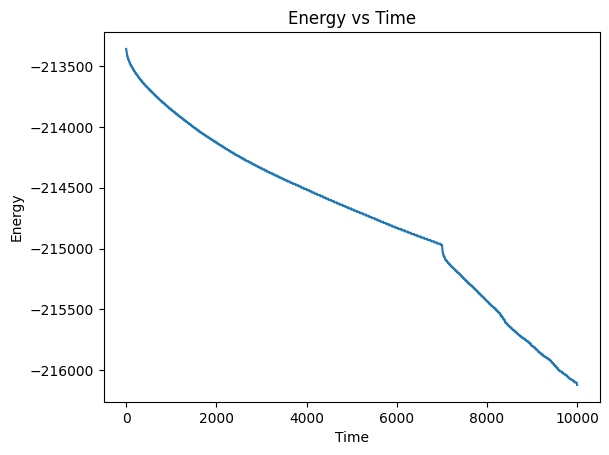

In [1]:
import matplotlib.pyplot as plt

# Specify the file path
file_path = "min/minall/summary.ENERGY"

# Read data from file
time = []
energy = []
with open(file_path, 'r') as file:
    for line in file:
        columns = line.split()
        time.append(float(columns[0]))
        energy.append(float(columns[1]))

# Plot the graph
plt.plot(time, energy)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy vs Time')
plt.show()

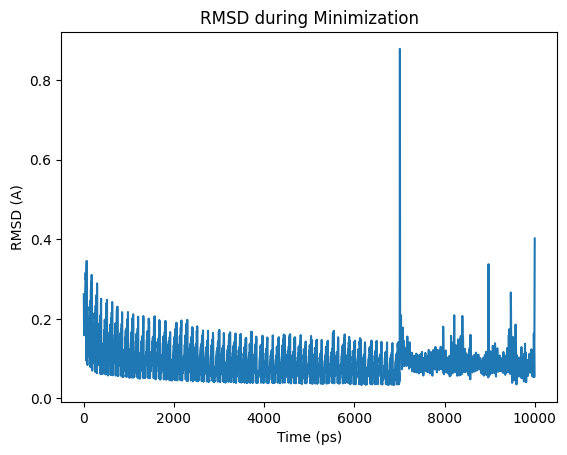

In [2]:
# The RMSD of the system throughout Minimization

file_path = "min/minall/summary.RMS"

# Read data from file
time = []
rms = []
with open(file_path, 'r') as file:
    for line in file:
        columns = line.split()
        time.append(float(columns[0]))
        rms.append(float(columns[1]))

# Plot the graph
plt.plot(time, rms)
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (A)')
plt.title('RMSD during Minimization')
plt.show()

### Equilibrate the complex

In [ ]:
# Make a equ file

$ mkdir equ
$ cd equ
$ cp ../min/5usz_complex.prmtop .
$ cp ../min/min_all.rst .


In [ ]:
# Make heat.in file

    """
&cntrl 
imin = 0, ! no energy minimization 
irest = 0, ! no restart 
ntx = 1,! no initial velocities will be read 
ig = -1, ! random initial velocities 
nstlim = 25000, ! run for 0.05 ns 
dt = 0.002, ! step length (fs) 
ntc = 2,! bonds involving H are constrained 
ntf = 2, 
cut = 12.0, 
ntb = 1, 
ntpr = 500, 
ntwx = 500,! write the structure every 500th step 
ntt = 3, ! Langevin temperature control
gamma_ln = 2.0, 
tempi = 10.0, ! initial temperature 
temp0 = 300.0, ! reference temperature 
ntr = 1,
restraintmask = ':1-273', 
restraint_wt = 2.0, ! restraint weight 
nmropt = 1,! flag for restraints set below 
ioutfm = 1,! netcdf trajectory 
/
&wt TYPE='TEMP0', istep1=0, istep2=25000, 
value1=0.1, value2=300.0, / 
&wt TYPE='END' /
    """

In [ ]:
# Make density.in file

    """
&cntrl 
imin=0, 
irest=1, ! restart the simulation from last run 
ntx=5, 
nstlim=25000, dt=0.002, 
ntc=2,ntf=2, 
cut=8.0, ntb=2, 
ntp=1, taup=1.0,! constant pressure 
ntpr=500, ntwx=500, 
ntt=3, gamma_ln=2.0, 
temp0=300.0, 
ntr=1, restraintmask=':1-273', 
restraint_wt=2.0, 
ioutfm = 1, 
/
    """

In [ ]:
# Make equil.in file

    """
&cntrl 
imin = 0, irest = 1,ntx = 5, nstlim = 50000, dt = 0.002, 
ntc = 2, ntf = 2, 
cut = 10.0, ntb = 2, ntp = 1, taup=2.0, 
ntpr = 500, ntwx = 500, 
ntt = 3, gamma_ln = 2.0, 
temp0 = 300.0, 
ntr = 1, restraintmask = ':1-273', 
restraint_wt = 0.5, 
ioutfm = 1, 
/
    """

In [ ]:
# Make a amberjob1.sbatch file

    """
#!/bin/bash

#SBATCH --job-name=Amber
#SBATCH --nodes=1
#SBATCH --tasks-per-node=20
#SBATCH --time=48:00:00
#SBATCH --mem=20GB


# Comments start here, above are not comments and should be in your script 
# go to your working directory: /scratch/qo210/comp-lab-class-2024/Week8/equ  
cd /scratch/qo210/comp-lab-class-2024/Week8/equ  

# load module to run amber

module purge
module load amber/openmpi/intel/20.11 

# run heating job
srun pmemd.MPI -O -i heat.in -o heat.out -p 5usz_complex.prmtop -c min_all.rst -r heat.rst -x heat.mdcrd -ref min_all.rst

# run density job
srun pmemd.MPI -O -i density.in -o density.out -p 5usz_complex.prmtop -c heat.rst -r density.rst -x density.mdcrd -ref min_all.rst

# run equil job
srun pmemd.MPI -O -i equil.in -o equil.out -p 5usz_complex.prmtop -c density.rst -r equil.rst -x equil.mdcrd -ref min_all.rst
    """

In [ ]:
$ sbatch amberjob1.sbatch

#### Analysis

In [ ]:
# Generate series of summary files from heat.out, density.out, and equil.out
# process_mdout perl: can process any files and append the results to single summary files
# This includes the potential(.EPTOT), kinetic(.EKTOT) and total energies(.ETOT)
# Also includes temperature, pressure, volume and density

$ process_mdout.perl ../heat.out ../density.out ../equil.out

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

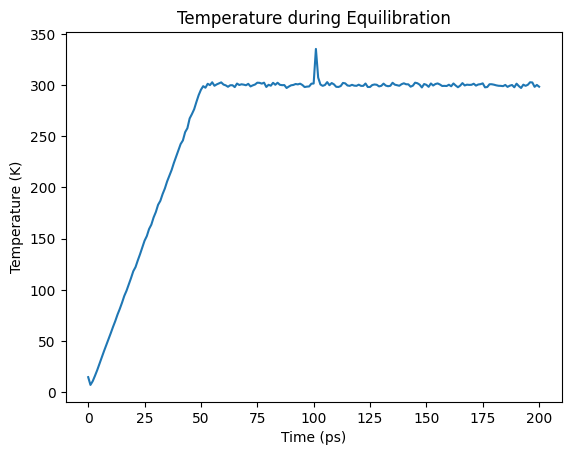

In [2]:
# Plot temperature of the system over the equilibration phase

file_path = "equ/analysis/summary.TEMP"
data = pd.read_csv(file_path, sep="\s+", header=None, names=['time', 'temperature'])

# Plot the graph
plt.plot(data['time'], data['temperature'])
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature during Equilibration')
plt.show()

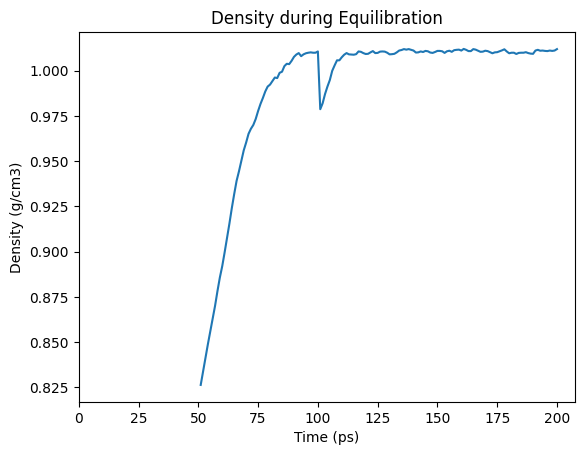

In [3]:
# Plot the density of the system throughout equilibration

file_path = "equ/analysis/summary.DENSITY"
data = pd.read_csv(file_path, sep="\s+", header=None, names=['time', 'density'])

# Filter out rows where column 2 is missing
data_filtered = data.dropna(subset=['density'])

# Plot the graph
plt.plot(data_filtered['time'], data_filtered['density'])
plt.xlim(left=0)
plt.xlabel('Time (ps)')
plt.ylabel('Density (g/cm3)')
plt.title('Density during Equilibration')
plt.show()

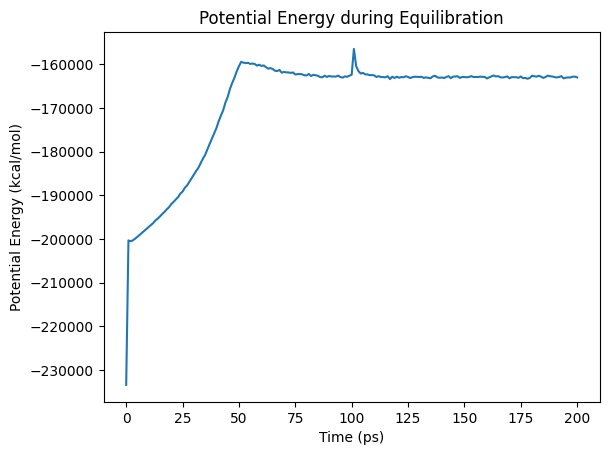

In [4]:
# Graph potential energy of the system throughout equilibration.

file_path = "equ/analysis/summary.EPTOT"
data = pd.read_csv(file_path, sep="\s+", header=None, names=['time', 'potential_energy'])

# Plot the graph
plt.plot(data['time'], data['potential_energy'])
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (kcal/mol)')
plt.title('Potential Energy during Equilibration')
plt.show()

In [ ]:
# Use cpptraj to calculate root mean square deviation (RMSD) for us as a function of time

$ cpptraj
$ parm 5usz_complex.prmtop
$ trajin ../heat.mdcrd
$ trajin ../density.mdcrd 
$ trajin ../equil.mdcrd 
$ rms first out 5usz_equilibration_rms.dat @C,CA,N time 1
$ run
$ quit


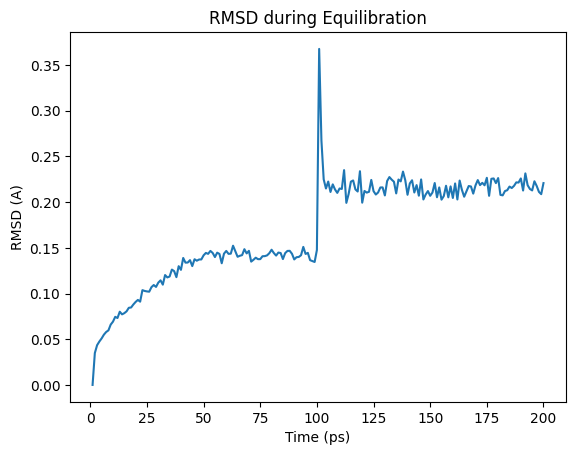

In [6]:

# The RMSD of the system throughout equilibration

file_path = "equ/analysis/5usz_equilibration_rms.dat"
data = pd.read_csv(file_path, sep="\s+")

# Plot the graph
plt.plot(data['#Frame'], data['RMSD_00001'])
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (A)')
plt.title('RMSD during Equilibration')

plt.show()

### Part 3: MD Production

In [ ]:
# Make a new md file in Week8

mkdir md
cd md
cp ../equ/5usz_complex.prmtop .
cp ../equ/equil.rst .

In [ ]:

# Make prod_npt.in input file

    """
MD simulation NPT without restraint
&cntrl 
imin = 0, irest = 1,ntx = 5, nstlim = 1000000, dt = 0.002, 
ntc = 2, ntf = 2, 
cut = 10.0, ntb = 2, ntp = 1, taup=2.0, 
ntpr = 500, ntwx = 500, 
ntt = 3, gamma_ln = 2.0, 
temp0 = 300.0, 
ioutfm = 1, 
/

In [ ]:
# Make a amberjob2.sbatch file

    """
 #!/bin/bash

#SBATCH --job-name=Amber
#SBATCH --nodes=1
#SBATCH --tasks-per-node=20
#SBATCH --time=48:00:00
#SBATCH --mem=20GB

cd /scratch/qo210/comp-lab-class-2024/Week8/md  

module purge

module load amber/openmpi/intel/20.11 

srun pmemd.MPI -O -i prod_npt.in -o prod1.out -p 5usz_complex.prmtop -c equil.rst -r prod1.rst -x prod1.mdcrd
    """

In [ ]:
# Make a "analysis" subfolder in the md folder 

$ process_mdout.perl ../prod1.out

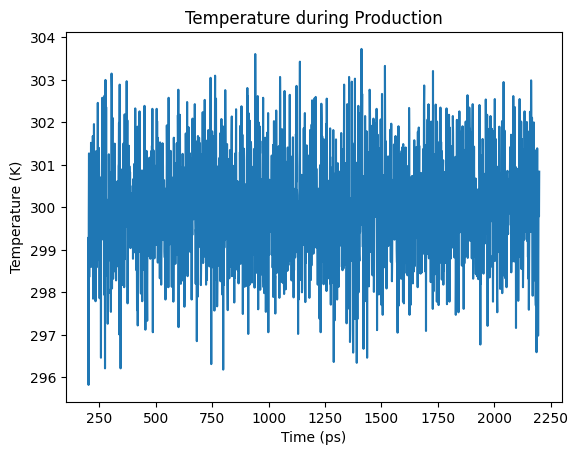

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Specify the file path
file_path = "md/analysis/summary.TEMP"
data = pd.read_csv(file_path, sep="\s+", header=None, names=['time', 'temperature'])

# Plot the graph
plt.plot(data['time'], data['temperature'])
plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature during Production')
plt.show()

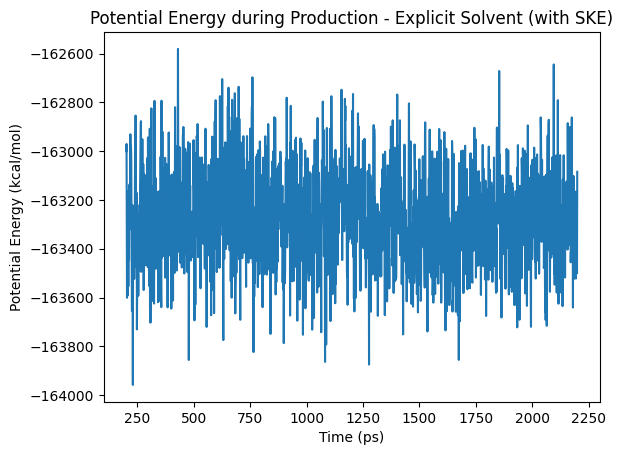

In [5]:
# Graph potential energy of the system throughout production

file_path = "md/analysis/summary.EPTOT"
data = pd.read_csv(file_path, sep="\s+", header=None, names=['time', 'potential_energy'])

# Plot the graph
plt.plot(data['time'], data['potential_energy'])
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (kcal/mol)')
plt.title('Potential Energy during Production - Explicit Solvent (with SKE)')
plt.show()

In [ ]:
# Make input file short_prod.ptraj 

    """
trajin ../prod1.mdcrd 1 2000 4 
center :1-273 
image familiar 
rms first @N,CA,C 
trajout prod_2ns.mdcrd 
run
    """

In [ ]:
$ cpptraj ../5usz_complex.prmtop short_prod.ptraj

#### RMSD

In [ ]:
# Use cpptraj to calculate root mean square deviation (RMSD) for us as a function of time
# Make prod_rmsd.ptraj input file
# Consider just the main backbone atoms, N, CA, C.

    """
trajin prod_2ns.mdcrd 
rms first mass out prod_rmsd.out @N,CA,C time 4
    """
    
# @C,CA,N means using these types of atoms for rmsd calculation

In [ ]:
$ cpptraj ../5usz_complex.prmtop prod_rmsd.ptraj

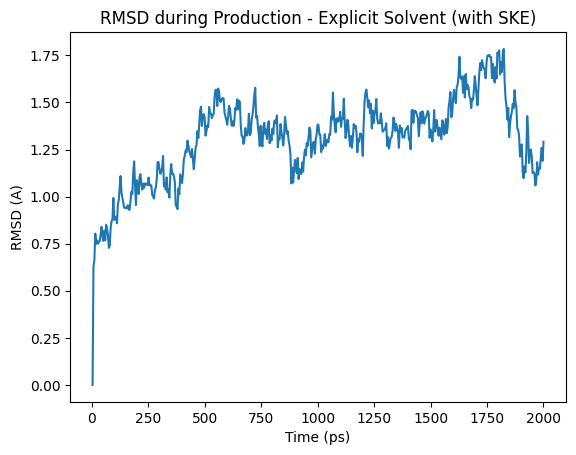

In [6]:
# The RMSD of the system throughout Minimization

file_path = "md/analysis/prod_rmsd.out"
data = pd.read_csv(file_path, sep="\s+")

# Plot the graph
plt.plot(data['#Frame'], data['RMSD_00001'])
plt.xlabel('Time (ps)')
plt.ylabel('RMSD (A)')
plt.title('RMSD during Production - Explicit Solvent (with SKE)')

plt.show()

In [ ]:
# /A SKE 901 N3  /A VAL 629 O    no hydrogen  2.633  N/A
# /A SKE 901 N1  /A GLN 626 OE1  no hydrogen  2.849  N/A
# /A SKE 901 N1  /A GLU 627 O    no hydrogen  2.992  N/A
# /A VAL 629 N   /A SKE 901 N2   no hydrogen  3.069  N/A
# /A LYS 581 NZ  /A SKE 901 O3   no hydrogen  3.085  N/A
# /A SER 698 OG  /A SKE 901 O3   no hydrogen  3.355  N/A


In [ ]:
# measure distances between atoms during the simulation
# hbond shown in chimeraX
# dist1: VAL93 O - SKE N3    (equal to VAL629 - SKE) 
# dist2: GLY90 OE1 - SKE N1  (equal to GLY626 - SKE)
# dist3: GLU91 O - SKE N1    (equal to GLU627 - SKE)
# dist4: VAL93 N - SKE N2    (equal to VAL629 - SKE)
# dist5: LYS45 NZ - SKE O3   (equal to LYS581 - SKE)
# dist6: SER162 OG - SKE O3  (equal to SER698 - SKE)


# Make dists.ptraj file

    """
trajin prod_2ns.mdcrd 
distance d1 :93@O :273@N3 out dist1.out 
distance d2 :90@OE1 :273@N1 out dist2.out
distance d3 :91@O :273@N1 out dist3.out
distance d4 :93@N :273@N2 out dist4.out
distance d5 :45@NZ :273@O3 out dist5.out
distance d6 :162@OG :273@O3 out dist6.out
    """

In [ ]:
$ cpptraj ../5usz_complex.prmtop dists.ptraj

# Output file: dist1.out 
# Output file: dist2.out 

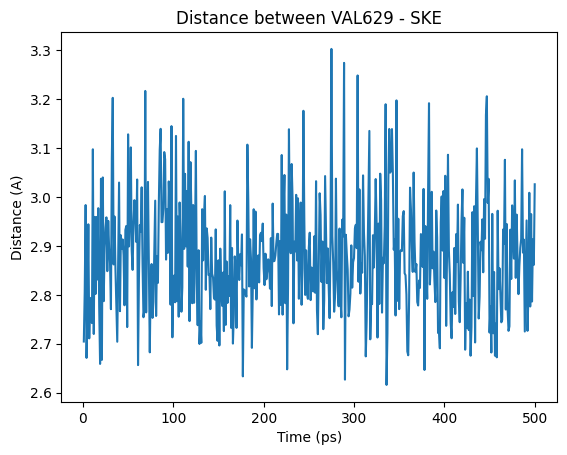

In [5]:
file_path = "md/analysis/dist1.out"
data = pd.read_csv(file_path, sep="\s+")

# Plot the graph
plt.plot(data['#Frame'], data['d1'])
plt.xlabel('Time (ps)')
plt.ylabel('Distance (A)')
plt.title('Distance between VAL629 - SKE')

plt.show()

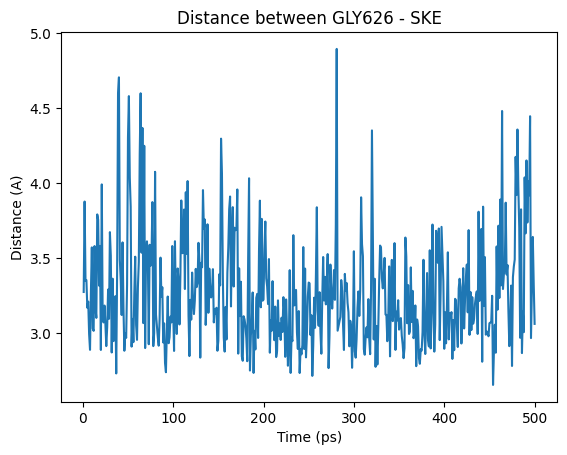

In [7]:
file_path = "md/analysis/dist2.out"
data = pd.read_csv(file_path, sep="\s+")

# Plot the graph
plt.plot(data['#Frame'], data['d2'])
plt.xlabel('Time (ps)')
plt.ylabel('Distance (A)')
plt.title('Distance between GLY626 - SKE')

plt.show()

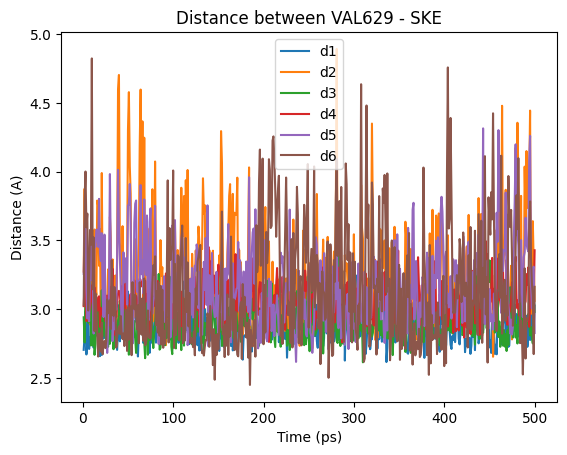

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths and corresponding column names
file_paths = [
    "md/analysis/dist1.out",
    "md/analysis/dist2.out",
    "md/analysis/dist3.out",
    "md/analysis/dist4.out",
    "md/analysis/dist5.out",
    "md/analysis/dist6.out"
]

column_names = ['d1', 'd2', 'd3', 'd4', 'd5', 'd6']

# Read and plot each dataset
for file_path, column_name in zip(file_paths, column_names):
    data = pd.read_csv(file_path, sep="\s+")
    plt.plot(data['#Frame'], data[column_name], label=column_name)

# Add labels, title, and legend
plt.xlabel('Time (ps)')
plt.ylabel('Distance (A)')
plt.title('Distance between VAL629 - SKE')
plt.legend()

# Show the plot
plt.show()
